In [68]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5, 10, 9)
d2 = datetime(2021,9, 1,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))

# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))

# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_USDC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(6, 18).x96_to_price)
pricedata.tail()

,timestamp,sqrtPriceX96,price
120400,1630457280,1355527382349696291973070296916222,0.000293
120401,1630457316,1355633495651790988012240522812889,0.000293
120402,1630457355,1356496723249880871370773228843790,0.000293
120403,1630457391,1356664209375015011561300805592324,0.000293
120404,1630457391,1357380036677709158041273101685800,0.000294


In [69]:
priceDf = pricedata
priceDf['datetime'] = list(map(lambda d: datetime.fromtimestamp(d), priceDf['timestamp'] ))
priceDt = priceDf.set_index('datetime')
priceDay = priceDt.resample('D').last()
priceDay['MA50'] = priceDay['price'].rolling(50).mean()
priceDay['Trend'] = priceDay['price']>=priceDay['MA50']
priceDay.index = list(map(lambda d: d.date(), priceDay.index))
trendDict = dict(priceDay['Trend'])
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
trendList = []
for i, v in priceDt.iterrows():
    trendList.append(trendDict[v['date']])
print(f'len of trendList:{len(trendList)}')
priceDt['trend'] = trendList

len of trendList:120405


In [70]:
priceDt

,timestamp,sqrtPriceX96,price,date,trend
datetime,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,2021-05-10,False
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,2021-05-10,False
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,2021-05-10,False
...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,2021-09-01,False
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,2021-09-01,False
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,2021-09-01,False


In [71]:
pricedata_res = pd.read_csv('../data/pricedata_res.csv',index_col=0)
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile25,CloseLowerMA
datetime,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000216,0.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000049,0.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000050,0.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000051,0.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000154,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000057,1.0,1.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000193,1.0,1.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000092,1.0,1.0,0.0


In [72]:
pricedata_res['price'] = priceDt['price']
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile25,CloseLowerMA
datetime,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,0.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,0.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,0.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,0.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,1.0,1.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,1.0,1.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,1.0,1.0,0.0


In [73]:
init_price = pricedata_res["price"][0]

decimal0 = 6
decimal1 = 18

init_amount0 = 1000000*1e6
init_amount1 = 0

In [74]:
import usdceth_vol_strategy
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(usdceth_vol_strategy)
strategy = usdceth_vol_strategy.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())

# strategy.run(swapdata, priceDt)
strategy.run(swapdata, pricedata_res)

report = strategy.report()

***********************************【创建空头池子】【第1次建池】***********************************
转换后钱包中余额 amount0:  399700000000.0 amount1:  153401599031946575872
price:  0.0002559611947100053
$$$$$$$【Upper Price】: 0.0002770031703531186
$$$$$$$【Lower Price】: 0.00023491921906689206
######【L】:166148733334094560【USDC】:399700000000【ETH】:116325210090321608704
将要投入池子的数量 amount_t0: 399700000000 amount_t1: 116325210090321002496
【RealWorldTime】:2021-05-10 09:17:52, Timestamp: 1620609472, Blocknumber: 12403600
Mint position： Position(L=166140346346211552, tick=[192720, 194400], range=[3611.9138, 4272.6292])
【Mint amount】: token0=399656.882767, token1=116.32521009032098
Wallet amount: token0=43.117233, token1=37.07638894162559
******************************************【撤销池子】【超边撤池】******************************************
Price(0.00023472150052335786) out of range(0.00023491921906689206, 0.0002770031703531186)
【RealWorldTime】:2021-05-12 10:50:12,Timestamp: 1620787812, Blocknumber: 12417002
Decreased positio

转换后钱包中余额 amount0:  314426383165.0 amount1:  154155681951205357782
price:  0.0003018182635587098
$$$$$$$【Upper Price】: 0.0003266300423818412
$$$$$$$【Lower Price】: 0.0002770064847355785
######【L】:147074602042757184【USDC】:314426383165【ETH】:107902424451892854784
将要投入池子的数量 amount_t0: 314426383164 amount_t1: 107902424451892854784
【RealWorldTime】:2021-05-17 11:23:20, Timestamp: 1621221800, Blocknumber: 12449489
Mint position： Position(L=146737566642452800, tick=[194400, 196020], range=[3071.7452, 3611.9138])
【Mint amount】: token0=312886.651677, token1=107.90242445189286
Wallet amount: token0=1539.731488, token1=46.253257499312504
******************************************【撤销池子】【超边撤池】******************************************
Price(0.00032674108939797906) out of range(0.0002770064847355785, 0.0003266300423818412)
【RealWorldTime】:2021-05-19 12:15:45,Timestamp: 1621397745, Blocknumber: 12462631
Decreased position： Position(L=0, tick=[194400, 196020], range=[3071.7452, 3611.9138])
【Decreased amou

******************************************【撤销池子】【超边撤池】******************************************
Price(0.0003507752154261053) out of range(0.0003511607718066704, 0.00041406849333343744)
【RealWorldTime】:2021-08-07 00:02:37,Timestamp: 1628265757, Blocknumber: 12972374
Decreased position： Position(L=0, tick=[196740, 198420], range=[2416.3494, 2858.3641])
【Decreased amount】: token0=412655.186469, token1=5.868900748353204
Wallet amount: token0=440366.382353, token1=37.42230973601525
撤池后经转换 Wallet amount: token0=543779.894873, token1=1.8749958991989328
***********************************【创建空头池子】【第22次建池】***********************************
转换后钱包中余额 amount0:  217348823982.0 amount1:  116287520787625936768
price:  0.00035067916648975027
$$$$$$$【Upper Price】: 0.00037950768671987623
$$$$$$$【Lower Price】: 0.00032185064625962436
######【L】:109583824718940768【USDC】:217348823982【ETH】:86658353422720892928
将要投入池子的数量 amount_t0: 217348823981 amount_t1: 86658353422721286144
【RealWorldTime】:2021-08-07 00:02:

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-10 09:17:52,399656.882767,0.000000,0.000000,0.000000,116.325,0.000000,0.000000,0.000000
1,2021-05-10 09:17:52,399656.882767,0.000000,0.000000,0.000000,116.325,0.000000,0.000000,0.000000
2,2021-05-10 09:23:50,400118.879585,0.230998,0.230998,0.230998,116.207,0.000000,0.000000,0.000000
3,2021-05-10 09:24:49,400128.728816,0.004924,0.235922,0.235922,116.204,0.000000,0.000000,0.000000
4,2021-05-10 09:24:49,400132.510921,0.001891,0.237813,0.237813,116.203,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1318,2021-05-12 10:37:19,817996.034013,0.000000,2844.299471,2844.299471,13.3932,0.001497,0.665824,0.665824
1319,2021-05-12 10:37:50,825024.543507,3.514254,2847.813725,2847.813725,11.7319,0.000000,0.665824,0.665824
1320,2021-05-12 10:38:41,840520.696155,7.748076,2855.561801,2855.561801,8.07674,0.000000,0.665824,0.665824
1321,2021-05-12 10:50:12,842648.059620,1.063681,2856.625482,2856.625482,7.57576,0.000000,0.665824,0.665824


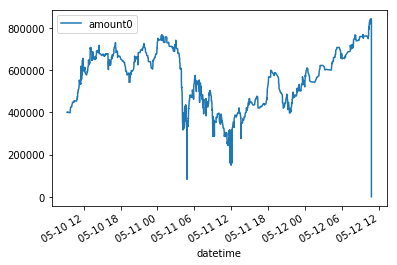

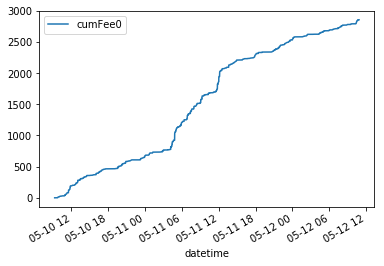

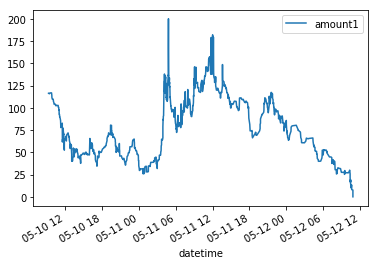

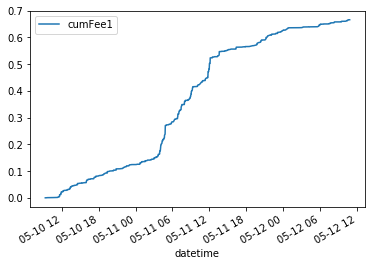

In [75]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-12 11:00:57,411000.275834,0.000000,0.000000,0.000000,111.231,0.000000,0.000000,0.000000
1,2021-05-12 11:02:02,408786.759726,0.000000,0.000000,0.000000,111.751,0.000260,0.000260,0.000260
2,2021-05-12 11:04:05,426082.214449,8.647727,8.647727,8.647727,107.696,0.000000,0.000260,0.000260
3,2021-05-12 11:04:37,407712.699646,0.000000,8.647727,8.647727,112.003,0.002154,0.002413,0.002413
4,2021-05-12 11:05:34,405729.930294,0.000000,8.647727,8.647727,112.469,0.000233,0.002646,0.002646
...,...,...,...,...,...,...,...,...,...
493,2021-05-13 03:11:21,18473.616425,0.000000,832.655041,832.655041,206.728,0.000253,0.244595,0.244595
494,2021-05-13 03:11:23,0.000000,0.000000,832.655041,832.655041,211.394,0.002333,0.246928,0.246928
495,2021-05-13 03:11:23,0.000000,0.000000,832.655041,832.655041,211.394,0.000000,0.246928,0.246928
496,2021-05-13 03:11:49,0.000000,0.000000,832.655041,832.655041,211.394,0.000000,0.246928,0.246928


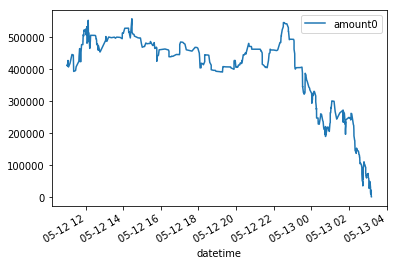

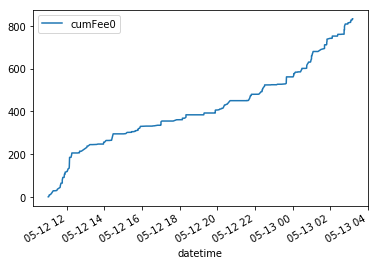

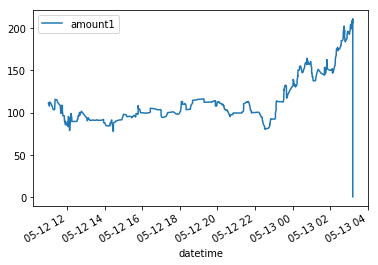

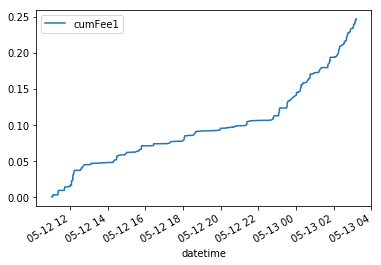

In [76]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-13 03:12:46,363882.959782,0.000000,0.000000,0.000000,112.495,0.000000,0.000000,0.000000
1,2021-05-13 03:13:02,366994.051605,1.555545,1.555545,1.555545,111.704,0.000000,0.000000,0.000000
2,2021-05-13 03:13:17,362025.202821,0.000000,1.555545,1.555545,112.967,0.000632,0.000632,0.000632
3,2021-05-13 03:13:33,374679.871806,6.327334,7.882879,7.882879,109.752,0.000000,0.000632,0.000632
4,2021-05-13 03:13:40,373684.208841,0.000000,7.882879,7.882879,110.004,0.000126,0.000758,0.000758
...,...,...,...,...,...,...,...,...,...
334,2021-05-13 08:02:51,23872.916586,0.000000,613.708114,613.708114,201.958,0.001621,0.197791,0.197791
335,2021-05-13 08:02:52,18856.750559,0.000000,613.708114,613.708114,203.324,0.000683,0.198474,0.198474
336,2021-05-13 08:03:09,17881.892130,0.000000,613.708114,613.708114,203.59,0.000133,0.198607,0.198607
337,2021-05-13 08:04:01,14317.052845,0.000000,613.708114,613.708114,204.562,0.000486,0.199093,0.199093


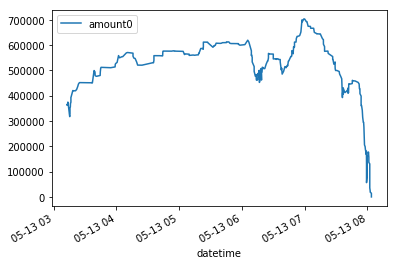

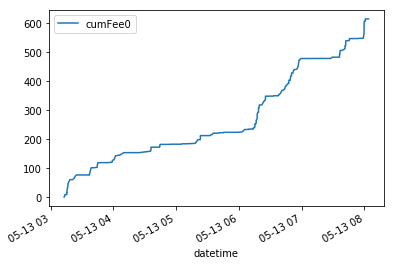

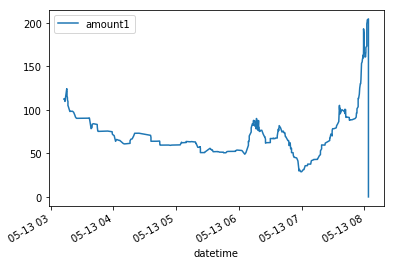

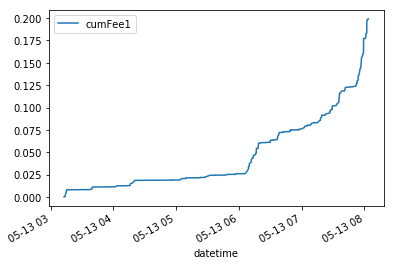

In [77]:
report.positions[3].get_balance(plain=True, draw_plot=True)

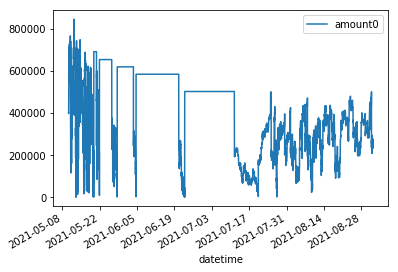

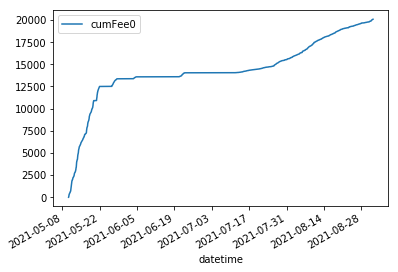

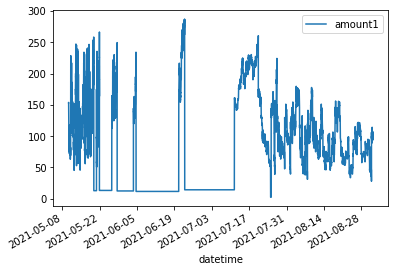

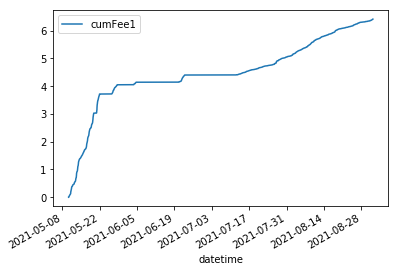

In [78]:
total_balance = report.total_balance(draw_plot=True, plain=True)

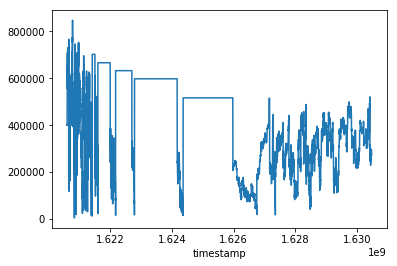

In [79]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
eth_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1)
usdt_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1) * price
usdt_balance+eth_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (usdt_balance+eth_balance)
tb_Timing.plot()

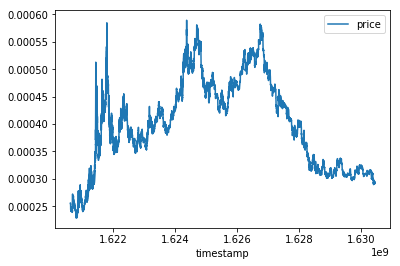

In [80]:
assets_value = pricedata.set_index("timestamp")["price"] * (total_balance["amount1"] / 10**decimal1) + total_balance["amount0"] / 10**decimal0
# assets_value.plot()
pricedata.set_index("timestamp")[["price"]].plot()